In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#BLEND TOGETHER IMAGES OF DIFFERENT SIZES
img1 = cv2.imread('../../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [4]:
img2 = cv2.resize(img2,(600,600))
img2.shape

(600, 600, 3)

In [5]:
large_img = img1
small_img = img2

In [6]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]

In [7]:
rows,cols,channels = img2.shape

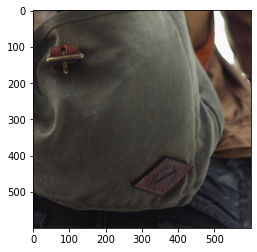

In [8]:
roi = img1[y_offset:1401, x_offset:943]
plt.imshow(roi)

In [12]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

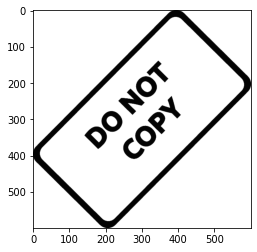

In [14]:
plt.imshow(img2gray,cmap='gray')

In [18]:
#we need the inverse of the image
mask_inv= cv2.bitwise_not(img2gray,)

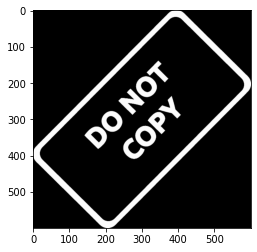

In [19]:
plt.imshow(mask_inv, cmap='gray')

In [20]:
mask_inv.shape

(600, 600)

In [21]:
import numpy as np

In [22]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [23]:
#white-background

In [24]:
bk =  cv2.bitwise_or(white_background ,white_background, mask=mask_inv)

In [25]:
bk.shape

(600, 600, 3)

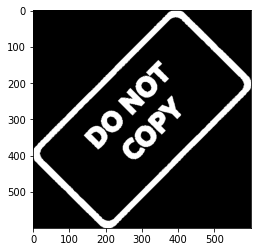

In [26]:
plt.imshow(bk)

In [27]:
fg= cv2.bitwise_or(img2,img2,mask=mask_inv)

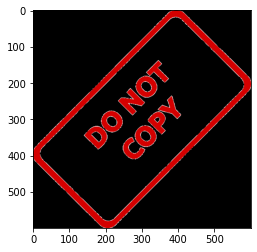

In [28]:
plt.imshow(fg)

In [29]:
final_roi = cv2.bitwise_or(roi,fg)

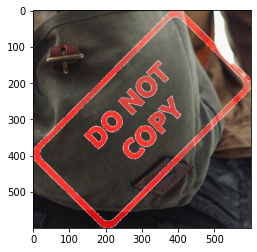

In [30]:
plt.imshow(final_roi)

In [32]:
large_img = img1
small_img = final_roi

In [33]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset: x_offset + small_img.shape[1]] = small_img

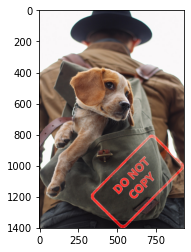

In [34]:
plt.imshow(large_img)